In [1]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as const
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties import unumpy as unp 
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray

Tabelle erstellen und Daten einlesen:

In [2]:
Nulleffekt1 = 960 / 900; Nulleffekt2 = 525 / 900                                    # Nullmessungen

md1blei = pd.read_csv('tables/md1blei.csv')         ;md1 = pd.DataFrame(md1blei).to_numpy()     # print(md1blei.to_latex(index = False, column_format= "c c c", decimal=',')) 
md2kupfer = pd.read_csv('tables/md2kupfer.csv')     ;md2 = pd.DataFrame(md2kupfer).to_numpy()   # print(md2kupfer.to_latex(index = False, column_format= "c c c", decimal=',')) 
md3alu = pd.read_csv('tables/md3alu.csv')           ;md3 = pd.DataFrame(md3alu).to_numpy()      # print(md3alu.to_latex(index = False, column_format= "c c c", decimal=',')) 


# Aktivität bei Eisen mit Fehlern berechnen
d1 = md1[:,0]
fehler_n1 = np.sqrt(md1[:,2]); fehler_n1 = np.round_(fehler_n1)
n1 = unp.uarray(md1[:,2], fehler_n1)
A1 = n1 / md1[:,1] - Nulleffekt1

n1 = pd.DataFrame(n1 ); A1 = pd.DataFrame(A1)
# print(A1.to_latex(index = False, column_format= "c", decimal=',')) 


# Aktivität bei Kupfer mit Fehlern berechnen
d2 = md2[:,0]
fehler_n2 = np.sqrt(md2[:,2]); fehler_n2 = np.round_(fehler_n2)
n2 = unp.uarray(md2[:,2], fehler_n2)
A2 = n2 / md2[:,1] - Nulleffekt1

n2 = pd.DataFrame(n2); A2 = pd.DataFrame(A2)
# print(A2.to_latex(index = False, column_format= "c", decimal=','))


# Aktivität bei Aluminium mit Fehlern berechnen
d3 = md3[:,0]
fehler_n3 = np.sqrt(md3[:,2]); fehler_n3 = np.round_(fehler_n3)
n3 = unp.uarray(md3[:,2], fehler_n3)
A3 = n3 / md3[:,1] - Nulleffekt2

n3 = pd.DataFrame(n3 * 10 **(-3)); A3 = pd.DataFrame(A3)
# print(n3.to_latex(index = False, column_format= "c", decimal=',')) 

a= -37.31569402535437 +- 2.889376292543148
b= 114.10713593426303 +- 2.169446989783951


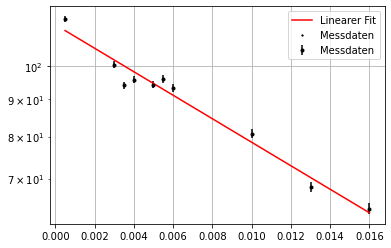

In [3]:
A2 = pd.DataFrame(A2).to_numpy()
d=d2*1e-3
cts = noms(A2[:,0])
errY = stds(A2[0,:])

def f(x, a, b):
    return np.exp(a*x)*b

params, covariance_matrix = curve_fit(f,d,cts)
errors = np.sqrt(np.diag(covariance_matrix))

print('a=', params[0], '+-', errors[0])
print('b=', params[1], '+-', errors[1])
a=ufloat(params[0],errors[0])
b=ufloat(params[1],errors[1])

plt.yscale('log')
plt.errorbar(d, cts, yerr=errY, fmt='.k', label='Messdaten')
plt.plot(d, f(d, *params), 'r-', label='Linearer Fit')
plt.plot(d, cts, 'k.', label="Messdaten", ms=2.5)
plt.legend(loc="best")
plt.grid()

Absorbtionskoeffizient von Aluminium

a= 0.6083260477850386 +- 0.06214358013495256
b= -2.604489490107649 +- 0.024772547324876788
a= -16.457247456658088 +- 6.405923657373177
b= 4.34131917752433 +- 0.9220913853574121
Rmax= 0.41+/-0.16
Emax[MeV]=  0.97+/-0.32


Text(0, 0.5, '$(A - A_0) / (1 / $ s $)$')

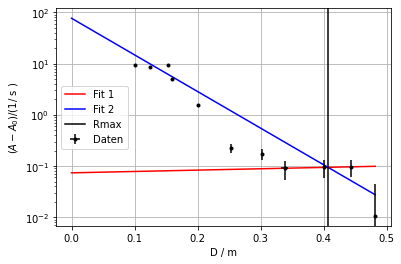

In [4]:
A3 = pd.DataFrame(A3).to_numpy()
cts=noms(A3[:,0])
ctserr=stds(A3[:,0])
d=d3*1e-3
derr = np.array([0,0,0.5,1,1,1,1,5,1,2,1]) * 1e-3
null=Nulleffekt2

ctsfit2=cts[1:7]
dfit2 = d[1:7]
ctsfit1=cts[7:-1]
dfit1 = d[7:-1]

def f(x, a, b):
    return np.exp(a*x+b)


params, covariance_matrix = curve_fit(f,dfit1, ctsfit1) #,p0=(-110,0)
errors = np.sqrt(np.diag(covariance_matrix))

print('a=', params[0], '+-', errors[0])
print('b=', params[1], '+-', errors[1])
a1=ufloat(params[0],errors[0])
b1=ufloat(params[1],errors[1])
schnittfit1=np.linspace(0,d[10])
plt.plot(schnittfit1, f(schnittfit1, *params), 'r-', label='Fit 1')

params, covariance_matrix = curve_fit(f,dfit2,ctsfit2) # ,p0=(1.5,0)
errors = np.sqrt(np.diag(covariance_matrix))

print('a=', params[0], '+-', errors[0])
print('b=', params[1], '+-', errors[1])
a2=ufloat(params[0],errors[0])
b2=ufloat(params[1],errors[1])
schnittfit2=np.linspace(0,d[10])
plt.plot(schnittfit2, f(schnittfit2, *params), 'b-', label='Fit 2')

rmax=(b2-b1)/(a1-a2)
print("Rmax=",rmax)
emax=1.92*unp.sqrt(rmax**2 + 0.22 * rmax)
print("Emax[MeV]= ",emax)
plt.yscale("log")
plt.errorbar(d, cts,yerr=ctserr, xerr=derr,fmt='.k', label="Daten")
plt.axvline(noms(rmax),color="k",label="Rmax")
plt.legend(loc="best")
plt.grid()
plt.xlabel(r"D / m")
plt.ylabel(r'$(A - A_0) / (1 / $ s $)$')

Fehler berechnen

In [5]:
N = ufloat(960, 31)     # Zählrate Nullmessung
print('Aktivität: ', noms(N) / 900 , stds(N / 900))

Aktivität:  1.0666666666666667 0.034444444444444444
